# IMPORTING LIBRARIES

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# READING THE DATASET

In [458]:
df=pd.read_csv("data_cleaned.csv")
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [459]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# ADDITIONAL LIBRARIES

In [460]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

# SEPARATING DEPENDENT AND INDEPENDENT VARIABLES

In [461]:
x=df.drop("Survived",axis=1)
y=df["Survived"]
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

# SPLITTING DATA BASED ON TRAIN TEST SPLIT

In [462]:
train_x,test_x,train_y,test_y=tts(x,y,random_state=52,stratify=y,test_size=0.25)

In [463]:
train_y.value_counts()/train_y.shape[0]

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [464]:
test_y.value_counts()/test_y.shape[0]

0    0.61435
1    0.38565
Name: Survived, dtype: float64

# MODEL1 (KNN)

In [465]:
knn=KNN(n_neighbors=18)
knn.fit(train_x,train_y)
predict1=knn.predict(test_x)
knn_score=f1_score(predict1,test_y)
predict1[:10],knn_score

(array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64), 0.7721518987341772)

# MODEL2 (LOGISTIC REGRESSION)

In [466]:
lreg=logreg(random_state=52)
lreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [467]:
test_predict=[]
sample_test_predict=lreg.predict_proba(test_x)[:,1]

In [468]:
for i in range(len(sample_test_predict)):
    if (sample_test_predict[i])>0.4:
        sample_test_predict[i]=1
    else:
        sample_test_predict[i]=0

In [469]:
logreg_score=f1_score(sample_test_predict,test_y)
logreg_score

0.7684210526315788

# MODEL3 (DECISION TREE)

In [470]:
def gini_depth(k):
    test_scores=[]
    for i in k:
        dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=i)
        dt_model.fit(train_x,train_y)
        test_predict=dt_model.predict(test_x)
        test_scores.append(f1_score(test_predict,test_y))
    return test_scores

In [471]:
k=list(range(1,30))
test_performance=[]
test_performance=gini_depth(k)

In [472]:
max1=np.max(test_performance)
ind=test_performance.index(max1)

In [473]:
def gini_maxfeatures(k):
    features=[]
    for i in k:
        dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=ind+1,max_features=i)
        dt_model.fit(train_x,train_y)
        test_predict=dt_model.predict(test_x)
        features.append(f1_score(test_predict,test_y))
    return features

In [474]:
k=list(range(1,x.shape[1]))
features=[]
features=gini_maxfeatures(k)

In [475]:
max2=np.max(features)
n_fea=features.index(max2)

In [476]:
dt_model=DecisionTreeClassifier(random_state=52,criterion="gini",max_depth=ind+1,max_features=n_fea+1)
dt_model.fit(train_x,train_y)
test_predict=dt_model.predict(test_x)
dt_score=f1_score(test_predict,test_y)
dt_score

0.7951807228915662

# ENSEMBLING THE MODEL WITH ADVANCED TECHNIQUES 

# RANDOM FOREST

In [477]:
from sklearn.ensemble import RandomForestClassifier

In [478]:
rf=RandomForestClassifier(random_state=52,max_depth=ind+1)
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=52, verbose=0,
                       warm_start=False)

In [479]:
new_predict=rf.predict(test_x)
f1_score(new_predict,test_y)

0.7425149700598802

HERE CHANGING THE MAX_DEPTH VALUE VARIES THE F1_SCORE

In [480]:
def rf_depth(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(f1_score(rf_test_predict,test_y))
    return rf_test_scores

In [481]:
k=list(range(1,40))
rf_test_performance=[]
rf_test_performance=rf_depth(k)

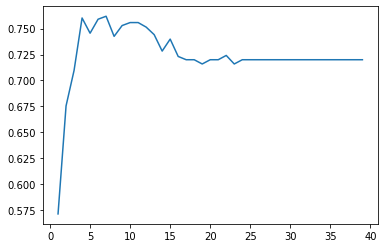

In [482]:
plt.plot(k,rf_test_performance)

NOW WE CONSIDER MAX DEPTH AT POSITION WHERE ACCURACY IS HIGH

In [483]:
rf_max=np.max(rf_test_performance)
rf_ind=rf_test_performance.index(rf_max)

In [484]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
f1_score(predict,test_y)

0.761904761904762

NOW WE NEED TO EXPLORE WITH MORE FEATURES (CRITERION,MAX_FEATURES,N_ESTIMATORS .....)

In [485]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=10)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
f1_score(predict,test_y)

0.7810650887573964

AS WE HAVE SEEN THAT VARYING THE VALUE OF N_ESTIMATORS VARIES ACCURACY.

In [486]:
def rf_estimators(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(f1_score(rf_test_predict,test_y))
    return rf_test_scores

In [487]:
k=list(range(1,100))
rf_test_performance=[]
rf_test_performance=rf_estimators(k)

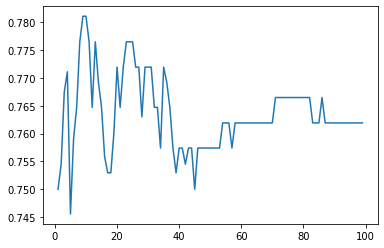

In [488]:
plt.plot(k,rf_test_performance)

In [489]:
rf_fea=np.max(rf_test_performance)
rf_fea_ind=rf_test_performance.index(rf_fea)

In [490]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
f1_score(predict,test_y)

0.7810650887573964

MAX FEATURES ...

In [491]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=24)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
f1_score(predict,test_y)

0.7529411764705882

AS WE HAVE SEEN THAT CHANGING FEATURES CHANGES THE ACCURACY.

In [492]:
def rf_features(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(f1_score(rf_test_predict,test_y))
    return rf_test_scores

In [493]:
k=list(range(1,x.shape[1]+1))
rf_test_performance=[]
rf_test_performance=rf_features(k)

In [494]:
rf_fea1=np.max(rf_test_performance)
rf_fea1_ind=rf_test_performance.index(rf_fea1)

APPLYING THOSE VALUES TO MODEL

In [495]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.7810650887573964

In [496]:
def rf_min_samples_split(k):
    test_predict=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=i)
        rf.fit(train_x,train_y)
        predict=rf.predict(test_x)
        test_predict.append(f1_score(predict,test_y))
    return test_predict

In [497]:
k=list(range(2,200))
test_split_predict=rf_min_samples_split(k)

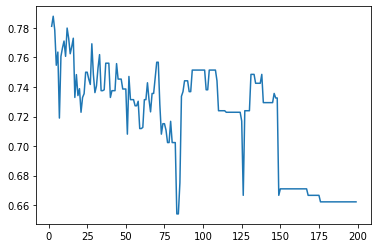

In [498]:
plt.plot(k,test_split_predict)

In [499]:
max_split=np.max(test_split_predict)
rf_spl=test_split_predict.index(max_split)

In [500]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.787878787878788

NOW ADDING THE FEATURES OF MIN_SAMPLES_LEAF

In [501]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2,min_samples_leaf=2)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.755813953488372

VARYING MIN_SAMPLES_LEAF VARIES ACCURACY

In [502]:
def rf_min_samples_leaf(k):
    test_predict=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2,min_samples_leaf=i)
        rf.fit(train_x,train_y)
        predict=rf.predict(test_x)
        test_predict.append(f1_score(predict,test_y))
    return test_predict

In [503]:
k=list(range(1,200))
test_leaf_predict=rf_min_samples_leaf(k)

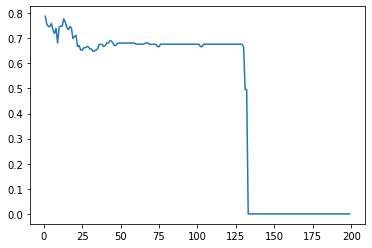

In [504]:
plt.plot(k,test_leaf_predict)

In [505]:
max_leaf=np.max(test_split_predict)
rf_leaf=test_leaf_predict.index(max_leaf)

In [506]:
rf=RandomForestClassifier(random_state=52,max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2,min_samples_leaf=rf_leaf+1)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.787878787878788

MODEL OBTAINED NOW IS THE BEST MODEL THAT COULD BE OBTAINED USING THE GINI

# SIMILARLY USING THE CRITERION OF ENTROPY NOW

In [507]:
rf=RandomForestClassifier(random_state=52,criterion="entropy")
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.7283236994219654

In [508]:
def rf_entropy_depth(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(f1_score(rf_test_predict,test_y))
    return rf_test_scores

In [509]:
k=list(range(1,40))
rf_test_performance=[]
rf_test_performance=rf_entropy_depth(k)

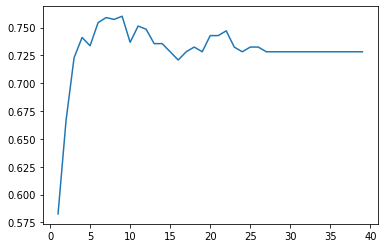

In [510]:
plt.plot(k,rf_test_performance)

In [511]:
rf_max=np.max(rf_test_performance)
rf_ind=rf_test_performance.index(rf_max)

In [512]:
rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
f1_score(predict,test_y)

0.7602339181286549

In [513]:
def rf_entropy_estimators(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(f1_score(rf_test_predict,test_y))
    return rf_test_scores

In [514]:
k=list(range(1,100))
rf_test_performance=[]
rf_test_performance=rf_entropy_estimators(k)

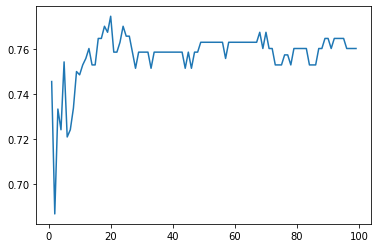

In [515]:
plt.plot(k,rf_test_performance)

In [516]:
rf_fea=np.max(rf_test_performance)
rf_fea_ind=rf_test_performance.index(rf_fea)

In [517]:
rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1)
rf.fit(train_x,train_y)
predict=rf.predict(test_x)
f1_score(predict,test_y)

0.7745664739884394

In [518]:
def rf_entropy_features(k):
    rf_test_scores=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=i)
        rf.fit(train_x,train_y)
        rf_test_predict=rf.predict(test_x)
        rf_test_scores.append(f1_score(rf_test_predict,test_y))
    return rf_test_scores

In [519]:
k=list(range(1,x.shape[1]+1))
rf_test_performance=[]
rf_test_performance=rf_entropy_features(k)

In [520]:
rf_fea1=np.max(rf_test_performance)
rf_fea1_ind=rf_test_performance.index(rf_fea1)

In [521]:
rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.783132530120482

In [522]:
def rf_entropy_min_samples_split(k):
    test_predict=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=i)
        rf.fit(train_x,train_y)
        predict=rf.predict(test_x)
        test_predict.append(f1_score(predict,test_y))
    return test_predict

In [523]:
k=list(range(2,200))
test_split_predict=rf_entropy_min_samples_split(k)

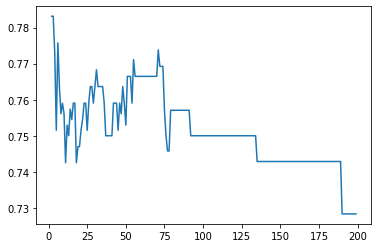

In [524]:
plt.plot(k,test_split_predict)

In [525]:
max_split=np.max(test_split_predict)
rf_spl=test_split_predict.index(max_split)

In [526]:
rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.783132530120482

In [527]:
def rf_entropy_min_samples_leaf(k):
    test_predict=[]
    for i in k:
        rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2,min_samples_leaf=i)
        rf.fit(train_x,train_y)
        predict=rf.predict(test_x)
        test_predict.append(f1_score(predict,test_y))
    return test_predict

In [528]:
k=list(range(1,200))
test_leaf_predict=rf_entropy_min_samples_leaf(k)

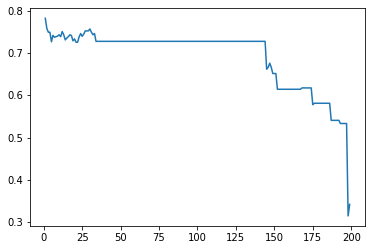

In [529]:
plt.plot(k,test_leaf_predict)

In [530]:
max_leaf=np.max(test_split_predict)
rf_leaf=test_leaf_predict.index(max_leaf)

In [531]:
rf=RandomForestClassifier(random_state=52,criterion="entropy",max_depth=rf_ind+1,n_estimators=rf_fea_ind+1,max_features=rf_fea1_ind+1,min_samples_split=rf_spl+2,min_samples_leaf=rf_leaf+1)
rf.fit(train_x,train_y)
test_predict=rf.predict(test_x)
f1_score(test_predict,test_y)

0.783132530120482

FINALLY WE HAVE SEEN THAT USING ALL POSSIBLE HYPERPARAMETERS THE BEST ACCURACY IS FOUND TO BE 0.7878